<a href="https://colab.research.google.com/github/srtaksande/MachineLearning/blob/main/Zomato_data_analysis%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description


This dataset has information on restaurants in Bangalore along with their Zomato ratings. Except for the ratings, the column is in a 'non-numeric' format, as seen in the .info() below. The data set also has missing values. Here are some tasks for you to attempt o this dataset
- Drop columns that you think are not relevant for any analysis
- Rename columns using rename() .Use a dictionary of old name:new name as an input to the rename function
- Choose columns that you think need to be in numeric format.Converting string to numeric using pd.to_numeric or .astype() . You may have to use str/re functions in some cases and also regex expressions https://www.youtube.com/watch?v=ykSuHWhh5hc&list=RDCMUCXgGY0wkgOzynnHvSEVmE3A&start_radio=1&rv=ykSuHWhh5hc&t=709   and for a more detailed tutorial looks look here  https://www.youtube.com/playlist?list=PL4cUxeGkcC9g6m_6Sld9Q4jzqdqHd2HiD   or use ggplot within python by installing the plotnine library
- Do an Exploratory data analysis by setting appropriate indexes , .loc methods , value_counts() ,describe etc. You can also use some basic pandas visualization methods such as this https://www.analyticsvidhya.com/blog/2021/07/how-to-perform-data-visualization-with-pandas/
- Create a separate header for "Missing value analysis". Take a look at missing values. This is a small dataset, so you can go over it column by column. I have shown some examples below. Comment on the nature of missing variables for each column. Write out possible reasons for the value to be missing.

- Try and figure out if in a given column the missing values are. Use statistical tests such as Little's test, Crosstabs for missing value  patterns  to justify your conclusion **you can create a missing value dummy for each variable to do such crosstabs**
    - Structural deficiencies
    - MCAR
    - MAR
    
- Choose appropriate treatment for treating missing values. You may use fillna() and interpolate() for treating missing values. You can use this for reference https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/?ref=lbp


You can use this template as a started code and build on top of this

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


## Dropping and renaming columns

In [ ]:
import pandas as pd

In [ ]:
tp = pd.read_csv('gdrive/My Drive/Colab Notebooks/zomato.csv',sep=',')


In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Getting insights of the data

In [ ]:
tp.shape

(51717, 17)

In [ ]:
tp.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Change datatypes

renaming approx cost col name

In [ ]:
tp.rename(columns={"approx_cost(for two people)":"Approx_cost","listed_in(type)":"Res_Type","listed_in(city)":"Area","rest_type":"cus_type"},inplace=True)

In [ ]:
tp.Approx_cost=tp.Approx_cost.str.replace(",","")
tp.Approx_cost=tp.Approx_cost.astype('float64')

In [ ]:
tp.url=tp.url.astype("string")
tp.address=tp.address.astype("string")
tp.name=tp.name.astype("string")
tp.phone=tp.phone.astype("string")
tp.location=tp.location.astype("string")
tp.cus_type=tp.cus_type.astype("category")
tp.dish_liked=tp.dish_liked.astype("string")
tp.cuisines=tp.cuisines.astype("string")
tp.Res_Type=tp.Res_Type.astype("category")
tp.Area=tp.Area.astype("category")


In [ ]:
tp.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [ ]:
tp =tp.replace({'online_order': {'Yes': True, 'No': False}})

In [ ]:
tp.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [ ]:
tp =tp.replace({'book_table': {'Yes': True, 'No': False}})

In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   url           51717 non-null  string  
 1   address       51717 non-null  string  
 2   name          51717 non-null  string  
 3   online_order  51717 non-null  bool    
 4   book_table    51717 non-null  bool    
 5   rate          43942 non-null  object  
 6   votes         51717 non-null  int64   
 7   phone         50509 non-null  string  
 8   location      51696 non-null  string  
 9   cus_type      51490 non-null  category
 10  dish_liked    23639 non-null  string  
 11  cuisines      51672 non-null  string  
 12  Approx_cost   51371 non-null  float64 
 13  reviews_list  51717 non-null  object  
 14  menu_item     51717 non-null  object  
 15  Res_Type      51717 non-null  category
 16  Area          51717 non-null  category
dtypes: bool(2), category(3), float64(1), int64(1), obj

In [ ]:
tp.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,cus_type,dish_liked,cuisines,Approx_cost,reviews_list,menu_item,Res_Type,Area
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1/5,775,080 42297555 +91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8/5,166,+91 8026612447 +91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Try regex on the rate feature

For the rate feature you will have to first extract the rate from the string which looks like 3.7/5 and then convert into a number

In [ ]:
type('rate')

str

There are two ways of extracting the rate out of the string .For example we only want 3.7 from 3.7/5

- Using regex we can just take the first 3 digits including the '.'. Build a regex pattern which identifies stings following the pattern of 'digit- . -digit'..this will represent 3.7
- ALternatively we can use string manipulation using str.split where u split the string by ' / ' and seperate t into two columns.Drop the second one
- Apply numeric conversion on the first columns

change rate to rating and remove the "/5"

In [ ]:
tp.rate=tp.rate.str.replace("/5","")
tp.rate.value_counts()

NEW     2208
3.9     2098
3.8     2022
3.7     2011
3.9     1874
        ... 
2.0        7
2.2        7
2.0        4
1.8        3
1.8        2
Name: rate, Length: 64, dtype: int64

Let replace New returants and  "-" with a rating of nan so we can convert the coloum to a float type

In [ ]:
import numpy as np

tp =tp.replace({'rate': {'NEW': np.nan, '-': np.nan}})

In [ ]:
tp.rate=tp.rate.astype('float64')

In [ ]:
from plotnine import ggplot, geom_bar, aes, stat_smooth, facet_wrap,coord_flip,geom_line


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


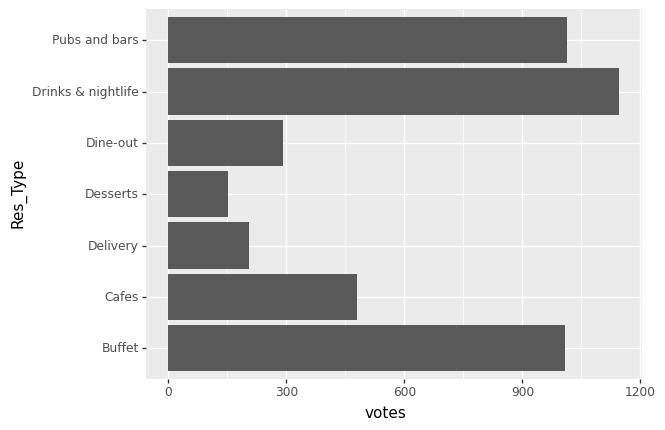

<ggplot: (8781106702145)>

In [ ]:
(ggplot(tp, aes('Res_Type', 'votes'))+ geom_bar(stat="summary")+ coord_flip())

From this plot we can see clubs/pubs and bars get the higest amount of reviews which we can possibly corelate with these places having higher footfall and also to the fact that zomato gold / zomato pro gives 2+2 on drinks and the users are later on prompted to give a review.

the same theory holds true when looking at the least reviews also which are dessert places which usually dont have zomato gold/ pro benifits and also usually tend to have lower footfall


/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 9 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


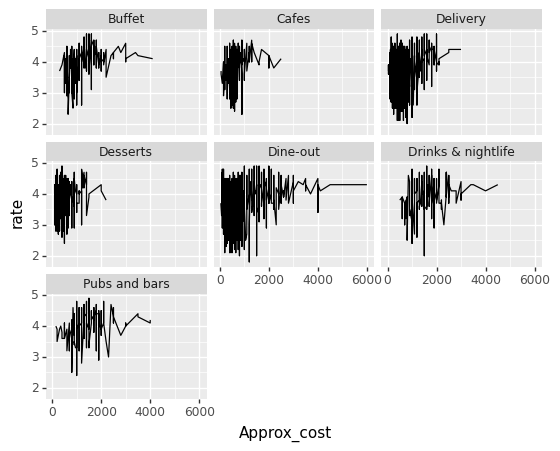

<ggplot: (8781096485097)>

In [ ]:
temp = tp[tp['rate'].notna()]
temp= temp[temp.rate != 0]

(ggplot(temp, aes('Approx_cost', 'rate'))+ geom_line()+ facet_wrap('~Res_Type'))

We dont see any clear trend of rating with the approx cost for 2 but one definate trend is the amount of noise we see in lower price ranges

from which we can conclude the higher priced places mantain a miniumum lvel of service actoss almost all categories  while for lower prices its as good as a hit or miss, or paybe some other factor might be influencing the trend there.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary : Removed 346 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


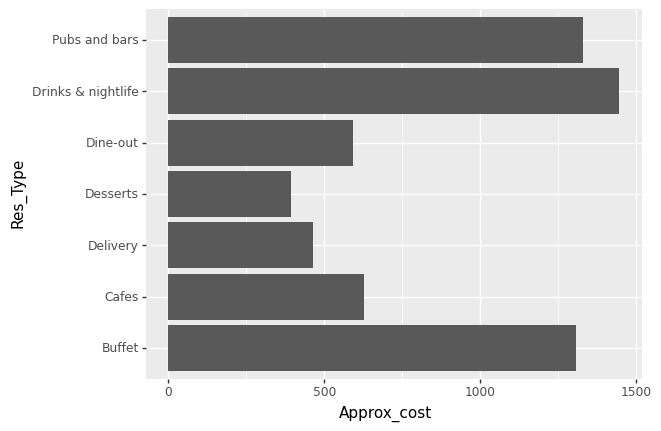

<ggplot: (8781096198457)>

In [ ]:
(ggplot(tp, aes('Res_Type', 'Approx_cost'))+ geom_bar(stat="summary")+ coord_flip())

we can see that rhe average costs of buffets , and places who primaraly serve alcohol have the higest cost for 2

another intresting inference we can draw is that as on average a dineout costs almost double of a buffets, we can say that in genral buffests are charging coustomers almost double of what they eat normally .


/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 247 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


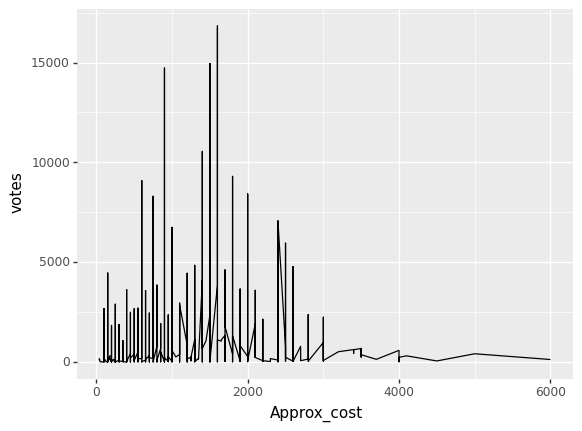

<ggplot: (8781095999101)>

In [ ]:
(ggplot(temp, aes('Approx_cost', 'votes'))+ geom_line())

from this graph we can see that there is no consistency in the amout of votes on ratings with price but we can see a few peeks wich would imply that these are the sweetspots for cost for 2 which see the higest footfall


In [ ]:
## EDA with some basic visualisation
## you can use padas in in built visualisation or ggplot for python using plotnine   library

In [ ]:
tp.isnull().sum()


url                 0
address             0
name                0
online_order        0
book_table          0
rate            10052
votes               0
phone            1208
location           21
cus_type          227
dish_liked      28078
cuisines           45
Approx_cost       346
reviews_list        0
menu_item           0
Res_Type            0
Area                0
dtype: int64

In [ ]:
# Missing value

tp.isnull().mean()


url             0.000000
address         0.000000
name            0.000000
online_order    0.000000
book_table      0.000000
rate            0.194365
votes           0.000000
phone           0.023358
location        0.000406
cus_type        0.004389
dish_liked      0.542916
cuisines        0.000870
Approx_cost     0.006690
reviews_list    0.000000
menu_item       0.000000
Res_Type        0.000000
Area            0.000000
dtype: float64

In [ ]:
tp.drop("dish_liked", axis=1,inplace=True)
tp.drop("phone", axis=1,inplace=True)

Dish_liked has more than 50% missing values.Lets drop it
phone number is also not relevant so lets drop iy

## Missing value analysis

In [ ]:
tp[tp.rate.isnull()]

,url,address,name,online_order,book_table,rate,votes,location,cus_type,cuisines,Approx_cost,reviews_list,menu_item,Res_Type,Area
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,False,False,NaN,0,Banashankari,Quick Bites,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,False,False,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,False,False,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,False,False,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,False,False,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,False,False,NaN,0,Brookefield,Quick Bites,North Indian,400.0,[],[],Dine-out,Whitefield
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,False,False,NaN,0,Whitefield,Bar,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,False,False,NaN,0,Whitefield,Bar,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,False,False,NaN,0,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield


here we can see that a lot of missing ratings places are places which dont have table booking or online ordering hence they re not relevant for analysison on zomato's platform so lets drop coloums where both are false


You can try using EDA here  .Create dummy vars for missing columns .for example missing_rate can have 1 for rate values which are missing and 0 for others.YOu can the try using bar plots/count plots  etc with missing in the X axis.YOu can also use cross-tabulations / pivot tables etc if you are taking the Panda route

creating ratings from review list by taking the rating avg

In [ ]:
import math
temp_rate=[]
for index,row in tp.iterrows():
  if math.isnan(row["rate"]):

    list_temp=eval(row["reviews_list"])
    if len(list_temp)!=0:
      reating_temp=0
      counter=0
      for i in list_temp:
        reating_temp=reating_temp+float(i[0][-3:])
        counter=counter + 1
      reating_temp=reating_temp/counter
      temp_rate.append(reating_temp)
    else:
      temp_rate.append(row["rate"])
  else:
    temp_rate.append(row["rate"])

tp["rate"]=temp_rate


## Missing value treatment

In [ ]:
tp.drop(tp[(tp.rate.isnull()) & (tp['online_order'] == False) & (tp['book_table'] == False)].index,inplace=True)

In [ ]:
tp[tp.rate.isnull()]

,url,address,name,online_order,book_table,rate,votes,location,cus_type,cuisines,Approx_cost,reviews_list,menu_item,Res_Type,Area
276,https://www.zomato.com/bangalore/ssv-upahar-ja...,"14/1, 8th Fmain, 3rd Block, Jayanagar, Bangalore",SSV Upahar,True,False,NaN,0,Jayanagar,Quick Bites,"South Indian, Chinese",300.0,[],"['Idli', 'Vada', 'Thatte Idli', 'Thatte Vada',...",Delivery,Banashankari
289,https://www.zomato.com/bangalore/south-cool-po...,"Near Metro Station R.v.Road, Basavanagudi, Ban...",South Cool Point,True,False,NaN,0,Basavanagudi,Dessert Parlor,Beverages,100.0,[],[],Delivery,Banashankari
306,https://www.zomato.com/bangalore/donne-biriyan...,"52, Dayanad Sagar, College Road, Teachers Colo...",Donne Biriyani combos,True,False,NaN,0,Kumaraswamy Layout,Casual Dining,Biryani,400.0,[],[],Delivery,Banashankari
436,https://www.zomato.com/bangalore/sri-manjunath...,"3rd Main Rd, Arehalli, Hosakerehalli, Uttaraha...",Sri Manjunatha Tandoori Corner,True,False,NaN,0,Uttarahalli,Quick Bites,Mughlai,300.0,[],[],Delivery,Banashankari
439,https://www.zomato.com/bangalore/cutcakes-kuma...,"30, 1st Main Road, Havish Nilaya, Samruddhi En...",Cutcakes,True,False,NaN,0,Kumaraswamy Layout,"Takeaway, Delivery",Bakery,300.0,[],"['Chocolate Truffle Cake [500 grams]', 'Chocol...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51506,https://www.zomato.com/bangalore/pans-aroma-wh...,"Shop 45, 1st Floor, Lakshmi Narayana Layout, N...",Pan's Aroma,True,False,NaN,0,Whitefield,Quick Bites,"Bengali, Biryani, North Indian, Chinese, Fast ...",400.0,[],[],Dine-out,Whitefield
51507,https://www.zomato.com/bangalore/curries-and-p...,"PWD Road, BK Abbaiah Layout, Akash Nagar, B Na...",Curries and Pickles,True,False,NaN,0,Whitefield,Quick Bites,"Andhra, North Indian, Biryani",250.0,[],"['Andhra Style Vegetable Meal', 'Andhra Non Ve...",Dine-out,Whitefield
51508,https://www.zomato.com/bangalore/curries-and-p...,"270, Channasandra Main Road, Near Hope Form Si...",Curries And Pickles,True,False,NaN,0,Whitefield,Quick Bites,"Andhra, North Indian, Biryani",250.0,[],"['Boneless Chicken 65', 'Boneless Chilli Chick...",Dine-out,Whitefield
51511,https://www.zomato.com/bangalore/kitchens-of-c...,"Prestige Shantiniketan, Destination Food Court...",Kitchens Of Chettinad,True,False,NaN,0,Whitefield,Quick Bites,South Indian,250.0,[],"['Chicken Biryani', 'Kabab Biryani', 'Egg Koth...",Dine-out,Whitefield


In [ ]:
tp.isnull().sum()

url                0
address            0
name               0
online_order       0
book_table         0
rate            1568
votes              0
location           0
cus_type         170
cuisines          20
Approx_cost      298
reviews_list       0
menu_item          0
Res_Type           0
Area               0
dtype: int64

the remaining rows dont have rewiews and by extention ratings so they can be safely dropped


In [ ]:
tp.dropna(subset = ["rate"], inplace=True)

In [ ]:
tp.isnull().sum()

url               0
address           0
name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
cus_type        160
cuisines         17
Approx_cost     298
reviews_list      0
menu_item         0
Res_Type          0
Area              0
dtype: int64

In [ ]:
tp[tp.Approx_cost.isnull()]

,url,address,name,online_order,book_table,rate,votes,location,cus_type,cuisines,Approx_cost,reviews_list,menu_item,Res_Type,Area
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),False,False,3.0,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),False,False,3.0,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,False,False,3.9,237,Marathahalli,Bar,Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
3954,https://www.zomato.com/bangalore/north-indian-...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",North Indian Kitchen,False,False,3.2,13,HSR,Takeaway,North Indian,NaN,"[('Rated 1.0', 'RATED\n Ordered green puri an...",[],Delivery,Bellandur
4040,https://www.zomato.com/bangalore/only-parathas...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",Only Parathas,False,False,3.3,6,HSR,"Takeaway, Delivery",North Indian,NaN,"[('Rated 1.0', 'RATED\n A bit too spicy, and ...",[],Delivery,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,False,False,4.0,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,False,False,4.0,0,Whitefield,Casual Dining,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,False,False,2.6,76,Whitefield,Casual Dining,North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,False,False,3.2,4,Whitefield,Casual Dining,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


the values for  cusine type, approx cost and cusines are not that important hence we can leave their missing values

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

In [ ]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45243 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   url           45243 non-null  string  
 1   address       45243 non-null  string  
 2   name          45243 non-null  string  
 3   online_order  45243 non-null  bool    
 4   book_table    45243 non-null  bool    
 5   rate          45243 non-null  float64 
 6   votes         45243 non-null  int64   
 7   location      45243 non-null  string  
 8   cus_type      45083 non-null  category
 9   cuisines      45226 non-null  string  
 10  Approx_cost   44945 non-null  float64 
 11  reviews_list  45243 non-null  object  
 12  menu_item     45243 non-null  object  
 13  Res_Type      45243 non-null  category
 14  Area          45243 non-null  category
dtypes: bool(2), category(3), float64(2), int64(1), object(2), string(5)
memory usage: 4.0+ MB


In [ ]:
tp_num = tp.select_dtypes(include=['float64',"int64"])
tp_string = tp.select_dtypes(include=['string',"object"])
tp_cat= tp.select_dtypes(exclude=['float64',"int64","string","object"])

In [ ]:
tp_cat

,online_order,book_table,cus_type,Res_Type,Area
0,True,True,Casual Dining,Buffet,Banashankari
1,True,False,Casual Dining,Buffet,Banashankari
2,True,False,"Cafe, Casual Dining",Buffet,Banashankari
3,False,False,Quick Bites,Buffet,Banashankari
4,False,False,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...
51710,False,False,Bar,Pubs and bars,Whitefield
51711,False,False,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,False,False,Bar,Pubs and bars,Whitefield
51715,False,True,Bar,Pubs and bars,Whitefield


In [ ]:
tp_string

,url,address,name,location,cuisines,reviews_list,menu_item
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Banashankari,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[]
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Banashankari,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[]
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Banashankari,"Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[]
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,Banashankari,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[]
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,Basavanagudi,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[]
...,...,...,...,...,...,...,...
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,Whitefield,Finger Food,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[]
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,Whitefield,"Andhra, South Indian, Chinese, North Indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[]
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[]
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[]


In [ ]:
tp_num

,rate,votes,Approx_cost
0,4.1,775,800.0
1,4.1,787,800.0
2,3.8,918,800.0
3,3.7,88,300.0
4,3.8,166,600.0
...,...,...,...
51710,4.0,0,900.0
51711,2.5,81,800.0
51712,3.6,27,1500.0
51715,4.3,236,2500.0


In [ ]:
imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(tp_num)
op=imp.transform(tp_num)
tp_num=pd.DataFrame(op,columns=tp_num.columns)
tp_num

,rate,votes,Approx_cost
0,4.1,775.0,800.0
1,4.1,787.0,800.0
2,3.8,918.0,800.0
3,3.7,88.0,300.0
4,3.8,166.0,600.0
...,...,...,...
45238,4.0,0.0,900.0
45239,2.5,81.0,800.0
45240,3.6,27.0,1500.0
45241,4.3,236.0,2500.0


In [ ]:
tp_cat.columns
tp_cat.replace({pd.NA: np.nan},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Find out what other strategies are there ?


In [ ]:
imputer.fit(tp_cat)  #It learns the mostFrequent for each categorical variable
imputer.statistics_

array([True, False, 'Quick Bites', 'Delivery', 'BTM'], dtype=object)

In [ ]:
op = imputer.transform(tp_cat) # fills with missing values # converts into a numpy array
type(op)

tp_cat=pd.DataFrame(op,columns=tp_cat.columns)
tp_cat

,online_order,book_table,cus_type,Res_Type,Area
0,True,True,Casual Dining,Buffet,Banashankari
1,True,False,Casual Dining,Buffet,Banashankari
2,True,False,"Cafe, Casual Dining",Buffet,Banashankari
3,False,False,Quick Bites,Buffet,Banashankari
4,False,False,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...
45238,False,False,Bar,Pubs and bars,Whitefield
45239,False,False,"Casual Dining, Bar",Pubs and bars,Whitefield
45240,False,False,Bar,Pubs and bars,Whitefield
45241,False,True,Bar,Pubs and bars,Whitefield


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Find out what other strategies are there ?


In [ ]:

tp_string.replace({pd.NA: np.nan},inplace=True)
imputer.fit(tp_string)  #It learns the mostFrequent for each categorical variable
imputer.statistics_

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array(['https://www.zomato.com/24-7RestaurantBangalore?context=eyJzZSI6eyJlIjpbIjUwNjk0IiwiNTA2MDQiLCIxODI0NjQ5OCIsIjE4NjQ4MjE3Iiw1MTY1OCwiNTI1NzIiLCI1MDYwMyIsIjE4NjY0OTk1IiwiMTg5MDQxMDAiLCI1MTM2NiIsIjUyMjgzIiwiNTg3MzMiLCI1MjQ1NCJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gTWFsbGVzaHdhcmFtIHNlcnZpbmcgQnVmZmV0In19',
       'Delivery Only', 'Cafe Coffee Day', 'BTM', 'North Indian', '[]',
       '[]'], dtype=object)

In [ ]:
op = imputer.transform(tp_string) # fills with missing values # converts into a numpy array
type(op)

tp_string=pd.DataFrame(op,columns=tp_string.columns)
tp_string

,url,address,name,location,cuisines,reviews_list,menu_item
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Banashankari,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[]
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Banashankari,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[]
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Banashankari,"Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[]
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,Banashankari,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[]
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,Basavanagudi,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[]
...,...,...,...,...,...,...,...
45238,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,Whitefield,Finger Food,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[]
45239,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,Whitefield,"Andhra, South Indian, Chinese, North Indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[]
45240,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[]
45241,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[]


In [ ]:
tp_cat.isnull().sum()

online_order    0
book_table      0
cus_type        0
Res_Type        0
Area            0
dtype: int64

In [ ]:
tp_num.isnull().sum()

rate           0
votes          0
Approx_cost    0
dtype: int64

In [ ]:
tp_string.isnull().sum()

url             0
address         0
name            0
location        0
cuisines        0
reviews_list    0
menu_item       0
dtype: int64